## Student: Deng, Zixuan (V00971633)
# Problem 8

Linear matters

Let’s move on to the following dataset: https://github.com/fivethirtyeight/data/blob/maste
r/candy-power-ranking/candy-data.csv.

In [1]:
import pandas as pd
import numpy as np
import random
np.random.seed(1337)
random.seed(1337)

# Plotting support
from matplotlib import pyplot as plt
from plotnine import *
# Standard libraries
import pandas as pd
import sklearn as sk

## a) [Linear; 10 points] 
Use closed matrix form of linear regression to predict the popularity
(winpercent) of candy from its sugar content (sugarpercent).

In [2]:
original_data = df= pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/candy-power-ranking/candy-data.csv',header=0)
df= pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/candy-power-ranking/candy-data.csv',header=0)
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [3]:
from numpy.linalg import inv
X = df['sugarpercent']
# need add x0 = 1 to each instance otherwise it will not work
X = np.c_[np.ones((85, 1)), X]
y = df['winpercent']

In [4]:
X.shape

(85, 2)

In [5]:
y.shape

(85,)

Linear Regression: 
$$ y = WX + b$$
$$ W = (X^TX)^{-1}X^Ty  $$


In [6]:
w= np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
w

array([44.60944181, 11.92386329])

In [7]:
y_predict = X.dot(w)
y_predict

array([53.33770961, 51.81145488, 44.7406043 , 44.7406043 , 55.41246218,
       50.15403824, 51.81145488, 48.3416109 , 55.41246218, 51.81145488,
       51.81145488, 53.33770961, 45.15793952, 53.33770961, 53.33770961,
       46.12377244, 53.33770961, 55.41246218, 50.15403824, 50.15403824,
       50.15403824, 50.15403824, 46.12377244, 49.73670314, 49.73670314,
       49.73670314, 45.71836112, 46.95844288, 48.3416109 , 47.23269173,
       45.15793952, 47.79311319, 54.4466289 , 54.4466289 , 55.00705036,
       48.2104484 , 51.81145488, 53.33770961, 56.11596952, 48.3416109 ,
       48.3416109 , 54.72087776, 51.81145488, 48.3416109 , 46.95844288,
       47.23269173, 50.15403824, 51.68029262, 45.71836112, 51.81145488,
       51.53720602, 45.01485318, 53.19462373, 49.45053018, 56.3902185 ,
       53.33770961, 54.86396435, 53.33770961, 55.00705036, 47.23269173,
       55.82979692, 55.82979692, 47.79311319, 47.79311319, 51.11987116,
       51.81145488, 45.43218835, 45.43218835, 46.40994504, 51.39

In [8]:
y_predict.shape

(85,)

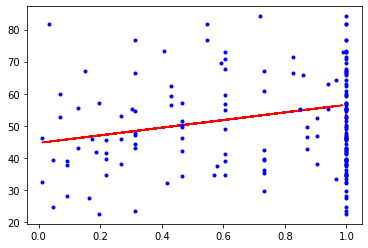

In [9]:
plt.plot(X, y_predict, "r-")
plt.plot(X, y, "b.")
plt.show()

## b) [EasyLinear; 10 points] 
# Use scikit-learn to do the same.

In [10]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(44.60944180753464, array([ 0.        , 11.92386329]))

In [11]:
new_y_predict = lin_reg.predict(X)

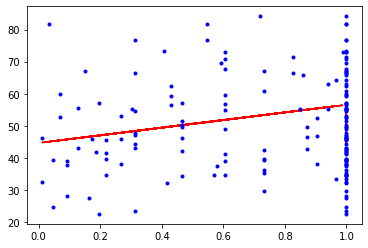

In [12]:
plt.plot(X, new_y_predict, "r-")
plt.plot(X, y, "b.")
plt.show()

In [13]:
X[:,1]

array([0.73199999, 0.60399997, 0.011     , 0.011     , 0.90600002,
       0.465     , 0.60399997, 0.31299999, 0.90600002, 0.60399997,
       0.60399997, 0.73199999, 0.046     , 0.73199999, 0.73199999,
       0.127     , 0.73199999, 0.90600002, 0.465     , 0.465     ,
       0.465     , 0.465     , 0.127     , 0.43000001, 0.43000001,
       0.43000001, 0.093     , 0.197     , 0.31299999, 0.22      ,
       0.046     , 0.26699999, 0.82499999, 0.82499999, 0.87199998,
       0.30199999, 0.60399997, 0.73199999, 0.96499997, 0.31299999,
       0.31299999, 0.84799999, 0.60399997, 0.31299999, 0.197     ,
       0.22      , 0.465     , 0.59299999, 0.093     , 0.60399997,
       0.58099997, 0.034     , 0.72000003, 0.40599999, 0.98799998,
       0.73199999, 0.86000001, 0.73199999, 0.87199998, 0.22      ,
       0.94099998, 0.94099998, 0.26699999, 0.26699999, 0.546     ,
       0.60399997, 0.069     , 0.069     , 0.15099999, 0.56900001,
       0.96499997, 0.41800001, 0.162     , 0.60399997, 0.60399

## c) NoSoLinear
What happens if you use polynomial regression with quadratic
and cubic **polynomials**

(85, 2)
(85,)


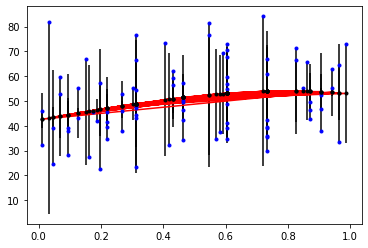

In [14]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)

poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)
poly_y_predict = poly_reg.predict(X_poly)

print(X.shape)
print(poly_y_predict.shape)
plt.plot(X[:,1], poly_y_predict, "r-")
plt.plot(X[:,1], y, "b.")
plt.errorbar(X[:,1], poly_y_predict,yerr = poly_y_predict - y,fmt='.k');
plt.show()




In [15]:
poly_y_predict - y 

0    -13.022502
1    -14.495311
2     10.398478
3     -3.456941
4      1.417430
        ...    
80     1.642381
81     5.432826
82     4.536576
83     4.509422
84     4.407207
Name: winpercent, Length: 85, dtype: float64

In [16]:
X

array([[1.        , 0.73199999],
       [1.        , 0.60399997],
       [1.        , 0.011     ],
       [1.        , 0.011     ],
       [1.        , 0.90600002],
       [1.        , 0.465     ],
       [1.        , 0.60399997],
       [1.        , 0.31299999],
       [1.        , 0.90600002],
       [1.        , 0.60399997],
       [1.        , 0.60399997],
       [1.        , 0.73199999],
       [1.        , 0.046     ],
       [1.        , 0.73199999],
       [1.        , 0.73199999],
       [1.        , 0.127     ],
       [1.        , 0.73199999],
       [1.        , 0.90600002],
       [1.        , 0.465     ],
       [1.        , 0.465     ],
       [1.        , 0.465     ],
       [1.        , 0.465     ],
       [1.        , 0.127     ],
       [1.        , 0.43000001],
       [1.        , 0.43000001],
       [1.        , 0.43000001],
       [1.        , 0.093     ],
       [1.        , 0.197     ],
       [1.        , 0.31299999],
       [1.        , 0.22      ],
       [1.

## d) Multiple; 10 points

In [17]:
X_new = df.loc[:,["pricepercent", "sugarpercent"]]
X_new

,pricepercent,sugarpercent
0,0.860,0.732
1,0.511,0.604
2,0.116,0.011
3,0.511,0.011
4,0.511,0.906
...,...,...
80,0.116,0.220
81,0.116,0.093
82,0.313,0.313
83,0.267,0.186


In [18]:
y =  df.loc[:,"winpercent"]

In [19]:
multi_feature_reg = LinearRegression()
multi_feature_reg.fit(X_new, y)
multi_feature_reg.intercept_, multi_feature_reg.coef_

(39.7867238357857, array([15.58649425,  6.73107225]))

In [20]:
multi_y_predict = multi_feature_reg.predict(X_new)

(85, 2)
(2, 100)


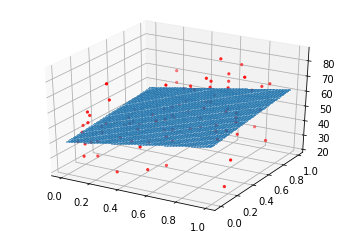

In [21]:
fig = plt.figure()

xx, yy = X_new.iloc[:,0], X_new.iloc[:,1]
z = multi_y_predict
z=np.expand_dims(z,axis=0)
print(X_new.shape)
ax = fig.add_subplot(111,projection='3d')
# plot the plane
ax.scatter(xx, yy, y, marker='.', color='red')
new_xx = np.arange(0,1,0.01)
new_yy = np.arange(0,1,0.01)
print(np.stack((new_xx, new_yy)).shape)
new_xx, new_yy = np.meshgrid(new_xx, new_yy)
new_z = multi_feature_reg.predict(np.stack((new_xx.flatten(), new_yy.flatten())).T)

# stack = np.stack((new_xx, new_yy)).reshape(3,-1)
# print(stack.shape)
# print(new_xx)
# print(new_xx.shape)
# new_z = multi_feature_reg.predict(new_xx)#np.stack((new_xx, new_yy)))
# new_z = 80*np.sin(np.sqrt((10*new_xx)**2 + (10*new_yy)**2))
# print(new_z.shape)
ax.plot_surface(new_xx, new_yy, new_z.reshape(new_xx.shape), alpha=0.5, linewidth=0, antialiased=False)
plt.show()

## e) Regularize [10 points]

In [22]:
features = df.iloc[:,[1,2,3,4,5,6,7,8,9,10,11]]
features
y =  df.loc[:,"winpercent"]
features

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent
0,1,0,1,0,0,1,0,1,0,0.732,0.860
1,1,0,0,0,1,0,0,1,0,0.604,0.511
2,0,0,0,0,0,0,0,0,0,0.011,0.116
3,0,0,0,0,0,0,0,0,0,0.011,0.511
4,0,1,0,0,0,0,0,0,0,0.906,0.511
...,...,...,...,...,...,...,...,...,...,...,...
80,0,1,0,0,0,0,0,0,0,0.220,0.116
81,0,1,0,0,0,0,1,0,0,0.093,0.116
82,0,1,0,0,0,0,0,0,1,0.313,0.313
83,0,0,1,0,0,0,1,0,0,0.186,0.267


In [24]:
from sklearn.linear_model import Ridge

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.3, random_state=42)
alpha = [0.1,1,2]
for i in alpha:
    ridge_reg = Ridge(alpha=i, solver="cholesky")
    ridge_reg.fit(X_train, y_train)
    print(ridge_reg.coef_)
    ridge_reg.predict(X_test)
    
    print("When alpha is ", i, ", the accuracy is",ridge_reg.score(X_test, y_test))   


[18.58948317  9.25874894  1.68796964  7.30358311  1.13341791  4.49210067
 -7.02390884  0.34041216 -5.11651245 11.07340593 -4.02022613]
When alpha is  0.1 , the accuracy is 0.3864610811837466
[16.22191663  7.22892644  1.40690998  6.40935618  0.95313177  3.64840156
 -5.71627309  1.41252462 -4.45160228  8.95522565 -1.87929244]
When alpha is  1 , the accuracy is 0.3825995315202902
[14.38100571  5.63357978  1.23380337  5.69852457  0.91748427  3.16963459
 -4.83355426  2.04399333 -4.00071973  7.47056306 -0.63913742]
When alpha is  2 , the accuracy is 0.3754070067747911


I found when alpha is 0.1, the model has the best accuracy. Feature competitorname is useless for predicting how popular a particular brand of candy is. The reason is the competitor's name does not influence the flavour of the candy. 

From the coefficient of linear regression, I find feature "hard", “pluribus”, and "pricepercent" are less important. And feature "fruity" is the best feature to predict "winpercent". 